<a href="https://colab.research.google.com/github/Susanna-Salata/Sigma-University/blob/main/Sigma_HW_6_Susanna_OLAP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Виконала: Сусанна Салата

Homework_6, рівень складності: I


In [10]:
import numpy as np
import pandas as pd
import math as mt
import matplotlib.pyplot as plt
import pylab
%matplotlib inline
import pip
import xlrd

Завдання - для визначення можливості автоматизації бізнес процесів, що реалізовані в
компанії замовника Вам пропонується розробити макет програмної реалізації мовою Python
обчислювального алгоритму ERP системи багатокритеріального прийняття рішень за умов：<br>
Розробити програмний скрипт, що реалізує оцінювання ефективності вибору житла. Вихідні
дані містять 12 критеріїв, з яких 4 – максимізованих, решта – мінімізованих. Кількість
аналогічних товарів – 8. Вхідні дані занесені у файл. Формат файлу, тип товару, зміст
показників та критеріїв ефективності та їх значення обрати самостійно.

З використанням OLAP технологій провести інтелектуальний аналіз результатів розв’язку
багатокритеріальної задачі, довести їх адекватність та сформувати висновки.

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
File_path = '/content/drive/MyDrive/Colab Notebooks/Data/Pr1.xls'
df = pd.read_excel(File_path)

In [13]:
def file_parsing(Data_name, sample_data):
    for name, values in sample_data[[Data_name]].items():
        values
    n_sample_data = int(len(values))
    S_real = np.zeros((n_sample_data))
    for i in range(n_sample_data):
        S_real[i] = values[i]
    return S_real

In [14]:
def matrix_generation (File_name):
    sample_data = pd.read_excel(File_name)
    print(sample_data)
    line_sample_data = int(sample_data.shape[0])
    column_sample_data = int(sample_data.shape[1])
    line_column_matrix = np.zeros(( (line_sample_data) ,(column_sample_data-2) ))
    Title_sample_data = sample_data.columns
    for i in range(1, (column_sample_data-1), 1):
        column_matrix=file_parsing(Title_sample_data[i], sample_data)
        for j in range(len(column_matrix)):
            line_column_matrix[j, (i-1)] = column_matrix[j]
    return line_column_matrix

In [15]:
def matrix_adapter (line_column_matrix, line):
    column_sample_matrix = np.shape(line_column_matrix)
    line_matrix = np.zeros((column_sample_matrix[1]))
    for j in range(column_sample_matrix[1]):
        line_matrix[j] =  line_column_matrix[line, j]
    return line_matrix

In [16]:
def Voronin(File_name, G1, G2, G3, G4, G5, G6, G7, G8, G9):

    # --------------------- вхідні дані -------------------------
    line_column_matrix = matrix_generation(File_name)
    column_matrix = np.shape(line_column_matrix)
    Integro = np.zeros((column_matrix[1]))

    F1 = matrix_adapter(line_column_matrix, 0)
    F2 = matrix_adapter(line_column_matrix, 1)
    F3 = matrix_adapter(line_column_matrix, 2)
    F4 = matrix_adapter(line_column_matrix, 3)
    F5 = matrix_adapter(line_column_matrix, 4)
    F6 = matrix_adapter(line_column_matrix, 5)
    F7 = matrix_adapter(line_column_matrix, 6)
    F8 = matrix_adapter(line_column_matrix, 7)
    F9 = matrix_adapter(line_column_matrix, 8)

    #--------------- нормалізація вхідних даних ------------------
    F10 = np.zeros((column_matrix[1]))
    F20 = np.zeros((column_matrix[1]))
    F30 = np.zeros((column_matrix[1]))
    F40 = np.zeros((column_matrix[1]))
    F50 = np.zeros((column_matrix[1]))
    F60 = np.zeros((column_matrix[1]))
    F70 = np.zeros((column_matrix[1]))
    F80 = np.zeros((column_matrix[1]))
    F90 = np.zeros((column_matrix[1]))

    GNorm = G1 + G2 + G3 + G4 + G5 + G6 + G6 + G7 + G8 + G9
    G10 = G1 / GNorm
    G20 = G2 / GNorm
    G30 = G3 / GNorm
    G40 = G4 / GNorm
    G50 = G5 / GNorm
    G60 = G6 / GNorm
    G70 = G7 / GNorm
    G80 = G8 / GNorm
    G90 = G9 / GNorm

    sum_F1=sum_F2=sum_F3=sum_F4=sum_F5=sum_F6=sum_F7=sum_F8=sum_F9 = 0

    for i in range(column_matrix[1]):
        sum_F1 = sum_F1 + F1[i]
        sum_F2 = sum_F2 + F2[i]
        sum_F3 = sum_F3 + F3[i]
        sum_F4 = sum_F4 + F4[i]
        sum_F5 = sum_F5 + F5[i]
        sum_F6 = sum_F6 + F6[i]
        sum_F7 = sum_F7 + (1 / F7[i])      # максимізований критерії
        sum_F8 = sum_F8 + (1 / F8[i])      # максимізований критерії
        sum_F9 = sum_F9 + F9[i]

    for i in range(column_matrix[1]):
        # --------------- нормалізація критеріїв ------------------
        F10[i] = F1[i] / sum_F1
        F20[i] = F2[i] / sum_F2
        F30[i] = F3[i] / sum_F3
        F40[i] = F4[i] / sum_F4
        F50[i] = F5[i] / sum_F5
        F60[i] = F6[i] / sum_F6
        F70[i] = (1/F7[i]) / sum_F7       # максимізований критерії
        F80[i] = (1/F8[i]) / sum_F8       # максимізований критерії
        F90[i] = F9[i] / sum_F9

        Integro[i] = (G10*(1 - F10[i]) ** (-1))  + (G20*(1 - F20[i]) ** (-1)) + (G30*(1 - F30[i]) ** (-1))
        + (G40 * (1 - F40[i]) ** (-1)) + (G50 * (1 - F50[i]) ** (-1)) + (G60 * (1 - F60[i]) ** (-1))
        + (G70*(1 - F70[i]) ** (-1))  + (G80*(1 - F80[i]) ** (-1)) + (G90*(1 - F90[i]) ** (-1))

        # --------------- генерація оптимального рішення ----------------
        min=10000
        opt=0
        for i in range(column_matrix[1]):
                if min > Integro[i]:
                   min = Integro[i]
                   opt=i
        print('Інтегрована оцінка (score):')
        print(Integro)
        print('Оптимальний варіант:', opt)

        return


In [17]:
def OLAP_cube (File_name, G1, G2, G3, G4, G5, G6, G7, G8, G9):

    # --------------------- вхідні дані -------------------------
    line_column_matrix = matrix_generation(File_name)
    column_matrix = np.shape(line_column_matrix)
    Integro = np.zeros((column_matrix[1]))

    F1 = matrix_adapter(line_column_matrix, 0)
    F2 = matrix_adapter(line_column_matrix, 1)
    F3 = matrix_adapter(line_column_matrix, 2)
    F4 = matrix_adapter(line_column_matrix, 3)
    F5 = matrix_adapter(line_column_matrix, 4)
    F6 = matrix_adapter(line_column_matrix, 5)
    F7 = matrix_adapter(line_column_matrix, 6)
    F8 = matrix_adapter(line_column_matrix, 7)
    F9 = matrix_adapter(line_column_matrix, 8)

    #--------------- нормалізація вхідних даних ------------------
    F10 = np.zeros((column_matrix[1]))
    F20 = np.zeros((column_matrix[1]))
    F30 = np.zeros((column_matrix[1]))
    F40 = np.zeros((column_matrix[1]))
    F50 = np.zeros((column_matrix[1]))
    F60 = np.zeros((column_matrix[1]))
    F70 = np.zeros((column_matrix[1]))
    F80 = np.zeros((column_matrix[1]))
    F90 = np.zeros((column_matrix[1]))

    GNorm = G1 + G2 + G3 + G4 + G5 + G6 + G6 + G7 + G8 + G9
    G10 = G1 / GNorm
    G20 = G2 / GNorm
    G30 = G3 / GNorm
    G40 = G4 / GNorm
    G50 = G5 / GNorm
    G60 = G6 / GNorm
    G70 = G7 / GNorm
    G80 = G8 / GNorm
    G90 = G9 / GNorm

    sum_F1=sum_F2=sum_F3=sum_F4=sum_F5=sum_F6=sum_F7=sum_F8=sum_F9 = 0

    for i in range(column_matrix[1]):
        sum_F1 = sum_F1 + F1[i]
        sum_F2 = sum_F2 + F2[i]
        sum_F3 = sum_F3 + F3[i]
        sum_F4 = sum_F4 + F4[i]
        sum_F5 = sum_F5 + F5[i]
        sum_F6 = sum_F6 + (1 / F6[i])  # максимізований критерії
        sum_F7 = sum_F7 + F7[i]
        sum_F8 = sum_F8 + F8[i]
        sum_F9 = sum_F9 + F9[i]

    for i in range(column_matrix[1]):
        # --------------- нормалізація критеріїв ------------------
        F10[i] = F1[i] / sum_F1
        F20[i] = F2[i] / sum_F2
        F30[i] = F3[i] / sum_F3
        F40[i] = F4[i] / sum_F4
        F50[i] = F5[i] / sum_F5
        F60[i] = (1/F6[i]) / sum_F6  # максимізований критерії
        F70[i] = F7[i] / sum_F7
        F80[i] = F8[i] / sum_F8
        F90[i] = F9[i] / sum_F9

        Integro[i] = (G10*(1 - F10[i]) ** (-1)) + (G20*(1 - F20[i]) ** (-1)) + (G30*(1 - F30[i]) ** (-1))
        + (G40 * (1 - F40[i]) ** (-1)) + (G50 * (1 - F50[i]) ** (-1)) + (G60 * (1 - F60[i]) ** (-1))
        + (G70*(1 - F70[i]) ** (-1)) + (G80*(1 - F80[i]) ** (-1)) + (G90*(1 - F90[i]) ** (-1))


    # --------------------- OLAP_cube ----------------------

    xg = np.ones((column_matrix[1]))
    for i in range(len(F10)):
        xg[i] = i

    fig = pylab.figure()
    ax = fig.add_subplot(projection='3d')
    clr = ['#4bb2c5', '#c5b47f', '#EAA228', '#579575', '#839557', '#958c12', '#953579', '#4b5de4', '#4bb2c5']
    ax.bar(xg, F10, 1, zdir='y', color=clr)
    ax.bar(xg, F20, 2, zdir='y', color=clr)
    ax.bar(xg, F30, 3, zdir='y', color=clr)
    ax.bar(xg, F40, 4, zdir='y', color=clr)
    ax.bar(xg, F50, 5, zdir='y', color=clr)
    ax.bar(xg, F60, 6, zdir='y', color=clr)
    ax.bar(xg, F70, 7, zdir='y', color=clr)
    ax.bar(xg, F80, 8, zdir='y', color=clr)
    ax.bar(xg, F90, 9, zdir='y', color=clr)
    ax.bar(xg, Integro, 10, zdir='y', color=clr)
    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_xlabel('X Label')
    pylab.show()

    return

In [18]:
# -------------------------------- БЛОК ГОЛОВНИХ ВИКЛИКІВ ------------------------------
if __name__ == '__main__':

    File_name = File_path
    # ---------------- коефіціенти переваги критеріїв -----------------
    G1 = G2 = G3 = G4 = G5 = G6 = G7 = G8 = G9 = 1
    G1 = 1           # коефіціент домінування критерію

    Voronin(File_name, G1, G2, G3, G4, G5, G6, G7, G8, G9)


                                          0  Житло 8  Житло 7  Житло 6  \
0                           Площа житла, м2    97.50   102.60     64.8   
1                          Кількість кімнат     3.00     4.00      2.0   
2                Якість ремонту, від 1 до 5     1.00     4.00      5.0   
3                           Висота стелі, м     2.65     2.85      3.1   
4                    Вартість житла, тис. $    90.00   160.00     85.0   
5      Вартість утримання будинку, грн/міс.  1000.00  1700.00   1900.0   
6                        Вік будинку, років    20.00     0.00      5.0   
7         Час від останнього ремонту, років    20.00     0.00      0.0   
8                                    Поверх     1.00     1.00     20.0   
9                     Відстань до метро, км     1.00     2.00      0.2   
10  Кількість незаселених квартир в підїзді     1.00    30.00      5.0   
11             Кількість квартир у під'їзді    86.00    96.00    140.0   

    Житло 5  Житло 4  Житло 3  Житло 

<ipython-input-16-ed25cc23e503>:49: RuntimeWarning: divide by zero encountered in double_scalars
  sum_F7 = sum_F7 + (1 / F7[i])      # максимізований критерії
<ipython-input-16-ed25cc23e503>:50: RuntimeWarning: divide by zero encountered in double_scalars
  sum_F8 = sum_F8 + (1 / F8[i])      # максимізований критерії


Порівнюємо із OLAP методом аналізу

                                          0  Житло 8  Житло 7  Житло 6  \
0                           Площа житла, м2    97.50   102.60     64.8   
1                          Кількість кімнат     3.00     4.00      2.0   
2                Якість ремонту, від 1 до 5     1.00     4.00      5.0   
3                           Висота стелі, м     2.65     2.85      3.1   
4                    Вартість житла, тис. $    90.00   160.00     85.0   
5      Вартість утримання будинку, грн/міс.  1000.00  1700.00   1900.0   
6                        Вік будинку, років    20.00     0.00      5.0   
7         Час від останнього ремонту, років    20.00     0.00      0.0   
8                                    Поверх     1.00     1.00     20.0   
9                     Відстань до метро, км     1.00     2.00      0.2   
10  Кількість незаселених квартир в підїзді     1.00    30.00      5.0   
11             Кількість квартир у під'їзді    86.00    96.00    140.0   

    Житло 5  Житло 4  Житло 3  Житло 

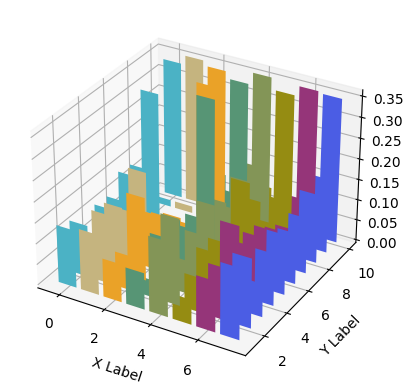

In [20]:

OLAP_cube(File_name, G1, G2, G3, G4, G5, G6, G7, G8, G9)


Висновок: OLAP-cube дозволив наочно порівняти варіанти і переконатися, що перший був найкращий.